In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# mean squared error
def MSE(original, compressed):
    return np.mean((original - compressed) ** 2)


# peak signal-to-noise radio
def PSNR(original, compressed):
    mse = MSE(original, compressed)
    if (mse == 0):
        return 100
    max_pixel = 255.0
    return 20 * math.log10(max_pixel / math.sqrt(mse))

def segment_img(path, outpath, K):
    in_img = cv2.imread(path)
    Z = in_img.reshape((-1, 3))
    Z = np.float32(Z)

    _, label, center = cv2.kmeans(
        Z,
        K,
        None,
        criteria,
        10,
        cv2.KMEANS_PP_CENTERS)

    center = np.uint8(center)
    res = center[label.flatten()]
    out_img = res.reshape((in_img.shape))
    print("MSE =", MSE(in_img, out_img))
    print("PSNR =", PSNR(in_img, out_img), "db")
    cv2.imwrite(outpath, out_img)

def plot_distortion(path):
    in_img = cv2.imread(path)
    Z = in_img.reshape((-1, 3))
    Z = np.float32(Z)

    losses = []
    for K in range(2, 11):
        compactness = cv2.kmeans(
            Z,
            K,
            None,
            criteria,
            10,
            cv2.KMEANS_PP_CENTERS)[0]
        losses.append(compactness)
    
    plt.figure(figsize=(12, 8))
    plt.plot(np.arange(2, 11), losses, 'bx-')
    plt.xlabel('Giá trị K')
    plt.ylabel('Độ biến dạng')
    plt.title('Biểu đồ phương pháp Elbow')
    plt.show()


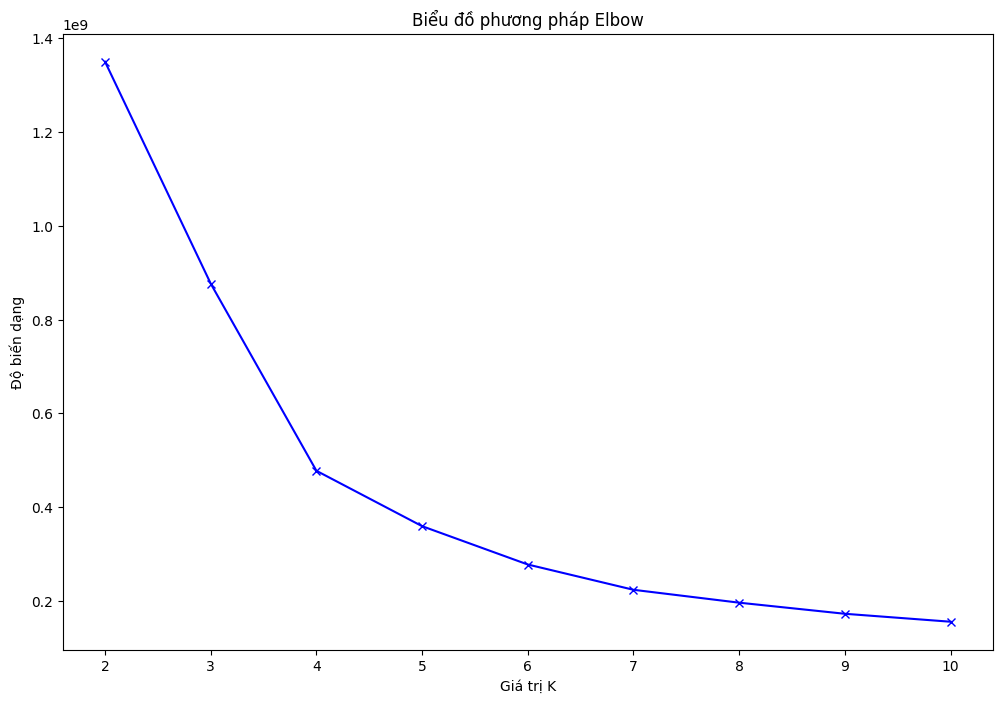

In [3]:
plot_distortion('img/hydrangea.jpg')

In [6]:
for i in range(2, 11):
    print('K = ', i)
    segment_img('img/hydrangea.jpg', f'img/hydrangea_out{i}.jpg', i)


K =  2
MSE = 97.45104909318324
PSNR = 28.24293842063546 db
K =  3
MSE = 81.20780644152596
PSNR = 29.03482581238562 db
K =  4
MSE = 75.00854674796749
PSNR = 29.379696095561552 db
K =  5
MSE = 73.8947138836773
PSNR = 29.444669889583505 db
K =  6
MSE = 65.31103736710445
PSNR = 29.980937789410042 db
K =  7
MSE = 62.08999296435272
PSNR = 30.20058750233442 db
K =  8
MSE = 60.93589430894309
PSNR = 30.282071715496595 db
K =  9
MSE = 58.39312617260788
PSNR = 30.467186343206883 db
K =  10
MSE = 53.63669559099437
PSNR = 30.836183465504305 db
